In [31]:
import pandas as pd
from prophet import Prophet

In [32]:
df = pd.read_csv("../../Data/Miles_Traveled.csv")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DATE              588 non-null    object 
 1   TRFVOLUSM227NFWA  588 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [34]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

In [35]:
df.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


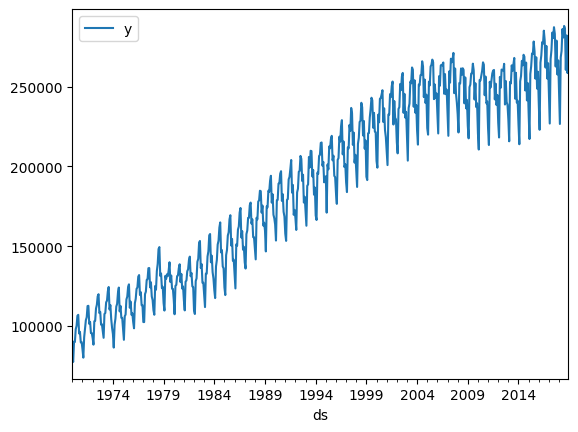

In [36]:
df.plot(x ='ds', y = 'y');

In [37]:
len(df)

588

In [38]:
train = df.iloc[:-12]
test = df.iloc[-12:]

In [39]:
len(train)  

576

len(test)

In [40]:
m  = Prophet()

In [41]:
m.fit(train)
future = m.make_future_dataframe(periods = 12, freq= 'MS')

23:50:20 - cmdstanpy - INFO - Chain [1] start processing
23:50:20 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
future.tail()

,ds
583,2018-08-01
584,2018-09-01
585,2018-10-01
586,2018-11-01
587,2018-12-01


In [45]:
forecast = m.predict(future)

In [46]:
train.head()

,ds,y
0,1970-01-01,80173.0
1,1970-02-01,77442.0
2,1970-03-01,90223.0
3,1970-04-01,89956.0
4,1970-05-01,97972.0


In [47]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
583,2018-08-01,263433.764946,273908.675065,285248.186135,263366.682009,263495.662864,16446.103774,16446.103774,16446.103774,16446.103774,16446.103774,16446.103774,0.0,0.0,0.0,279879.868721
584,2018-09-01,263575.997014,255762.947507,267845.111864,263469.443704,263668.577439,-1672.204614,-1672.204614,-1672.204614,-1672.204614,-1672.204614,-1672.204614,0.0,0.0,0.0,261903.792400
585,2018-10-01,263713.640950,263324.153209,274826.180080,263572.846800,263844.984851,5303.845016,5303.845016,5303.845016,5303.845016,5303.845016,5303.845016,0.0,0.0,0.0,269017.485965
586,2018-11-01,263855.873017,249659.240438,261103.468732,263680.396959,264024.422627,-8211.000928,-8211.000928,-8211.000928,-8211.000928,-8211.000928,-8211.000928,0.0,0.0,0.0,255644.872089
587,2018-12-01,263993.516953,251465.659497,263073.833421,263779.783355,264214.473941,-6924.466446,-6924.466446,-6924.466446,-6924.466446,-6924.466446,-6924.466446,0.0,0.0,0.0,257069.050507


<Axes: xlabel='ds'>

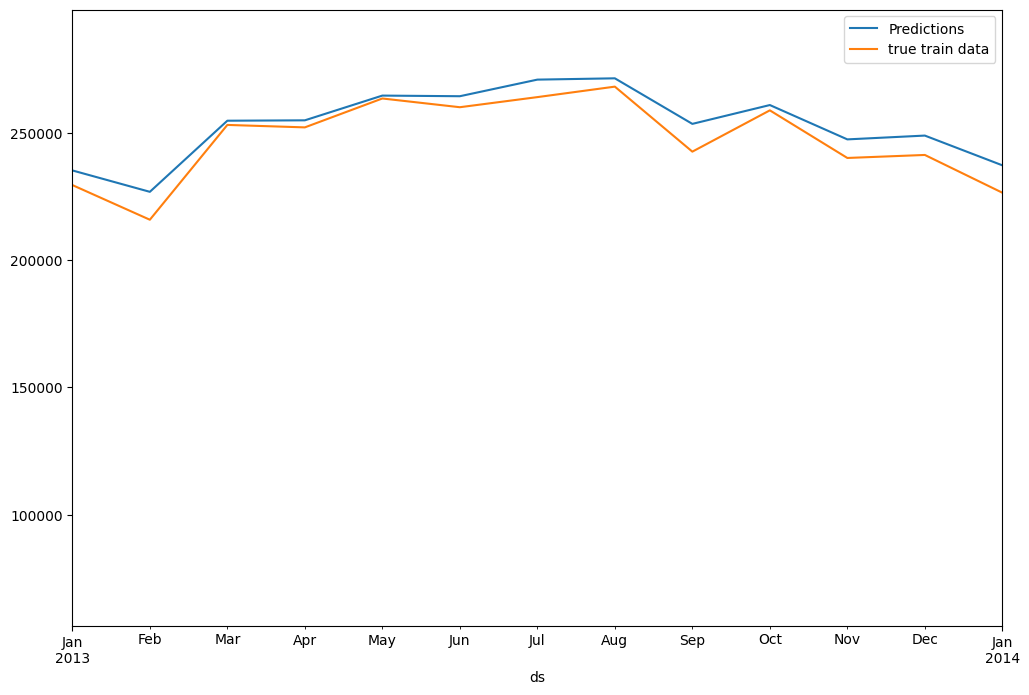

In [53]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Predictions', legend = True, figsize = (12,8))
# forecast includes the original data as well and at the very end includes thhe forecasted data as well
train.plot(x ='ds', y ='y', label = 'true train data', legend = True, ax =ax, xlim = ('2013-01-01','2014-01-01'))


<Axes: xlabel='ds'>

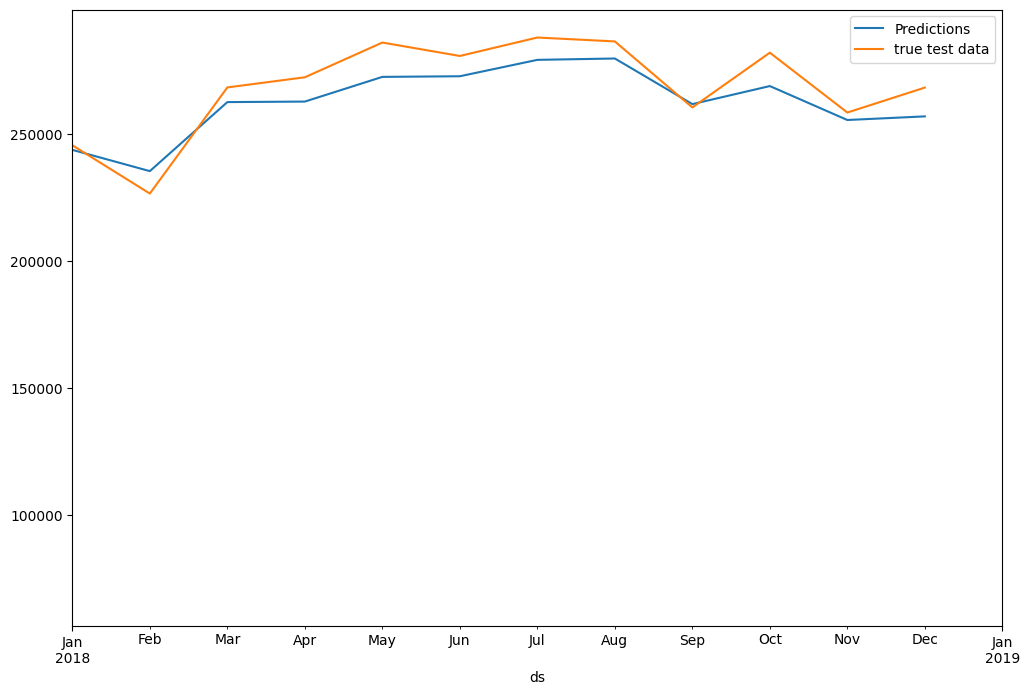

In [56]:
ax = forecast.plot(x = 'ds', y = 'yhat', label = 'Predictions', legend = True, figsize = (12,8))
# forecast includes the original data as well and at the very end includes thhe forecasted data as well
test.plot(x ='ds', y ='y', label = 'true test data', legend = True, ax =ax, xlim = ('2018-01-01','2019-01-01'))


In [57]:
from statsmodels.tools.eval_measures import rmse

In [59]:
predictions = forecast.iloc[-12:]['yhat']

In [60]:
predictions

576    243869.071258
577    235498.375832
578    262700.620438
579    262904.952053
580    272630.294732
581    272883.308600
582    279342.929360
583    279879.868721
584    261903.792400
585    269017.485965
586    255644.872089
587    257069.050507
Name: yhat, dtype: float64

In [61]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [62]:
rmse(predictions, test['y'])

8604.302194732816

In [63]:
test['y'].mean()

268739.6666666667

In [64]:
## not bad but not that good too

In [65]:
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

In [66]:
## inital training period 
initial = 5*365
## 5 years for training
initial = str(initial) + ' days'
print(initial)

1825 days


In [68]:
## period length for cv
# 5 years
period = 5*365
period = str(period) + ' days'
print(period)

1825 days


In [69]:
## horizon for predictions for each
horizon = 365
horizon = str(horizon) + ' days'
print(horizon)

365 days


In [71]:
df_cv = cross_validation(m, initial = initial , period = period, horizon = horizon)

  0%|          | 0/9 [00:00<?, ?it/s]00:31:13 - cmdstanpy - INFO - Chain [1] start processing
00:31:14 - cmdstanpy - INFO - Chain [1] done processing
 11%|█         | 1/9 [00:00<00:05,  1.48it/s]00:31:14 - cmdstanpy - INFO - Chain [1] start processing
00:31:14 - cmdstanpy - INFO - Chain [1] done processing
 22%|██▏       | 2/9 [00:00<00:02,  2.58it/s]00:31:14 - cmdstanpy - INFO - Chain [1] start processing
00:31:14 - cmdstanpy - INFO - Chain [1] done processing
 33%|███▎      | 3/9 [00:01<00:01,  3.31it/s]00:31:14 - cmdstanpy - INFO - Chain [1] start processing
00:31:15 - cmdstanpy - INFO - Chain [1] done processing
 44%|████▍     | 4/9 [00:01<00:01,  3.61it/s]00:31:15 - cmdstanpy - INFO - Chain [1] start processing
00:31:15 - cmdstanpy - INFO - Chain [1] done processing
 56%|█████▌    | 5/9 [00:01<00:01,  3.44it/s]00:31:15 - cmdstanpy - INFO - Chain [1] start processing
00:31:15 - cmdstanpy - INFO - Chain [1] done processing
 67%|██████▋   | 6/9 [00:01<00:00,  3.63it/s]00:31:15 - cmds

In [72]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1977-01-01,108479.045736,107005.128042,109960.050792,102445.0,1976-12-11
1,1977-02-01,102996.069494,101579.510739,104509.773857,102416.0,1976-12-11
2,1977-03-01,118973.276565,117569.174750,120414.660521,119960.0,1976-12-11
3,1977-04-01,120612.885433,119207.978717,122106.276029,121513.0,1976-12-11
4,1977-05-01,127882.985779,126471.750971,129322.772105,128884.0,1976-12-11


In [73]:
len(df_cv)

108

In [74]:
performance_metrics(df_cv)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,52 days,2.444316e+07,4944.002132,4543.524001,0.027822,0.023395,0.027403,0.4
1,53 days,2.194478e+07,4684.526050,4278.142802,0.025076,0.023395,0.024777,0.4
2,54 days,1.850311e+07,4301.523929,3755.453769,0.020194,0.022195,0.020035,0.5
3,55 days,2.338050e+07,4835.338344,4274.607033,0.023245,0.023395,0.022996,0.4
4,57 days,2.120514e+07,4604.904249,4014.174881,0.021540,0.022195,0.021331,0.5
...,...,...,...,...,...,...,...,...
94,360 days,1.856034e+07,4308.171304,3760.668727,0.019600,0.019726,0.019607,0.5
95,361 days,1.763795e+07,4199.756090,3480.698150,0.018200,0.018869,0.018218,0.5
96,362 days,3.198060e+07,5655.139536,4409.507626,0.022012,0.024765,0.021910,0.4
97,364 days,3.018403e+07,5493.999829,4241.143037,0.021382,0.021611,0.021293,0.5


c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\thaku\Downloads\m23\ann_class_pro\annenv\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


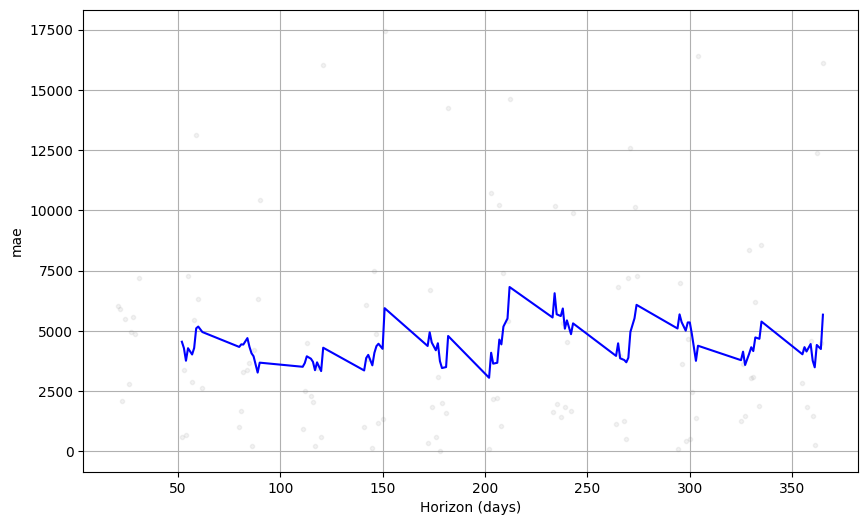

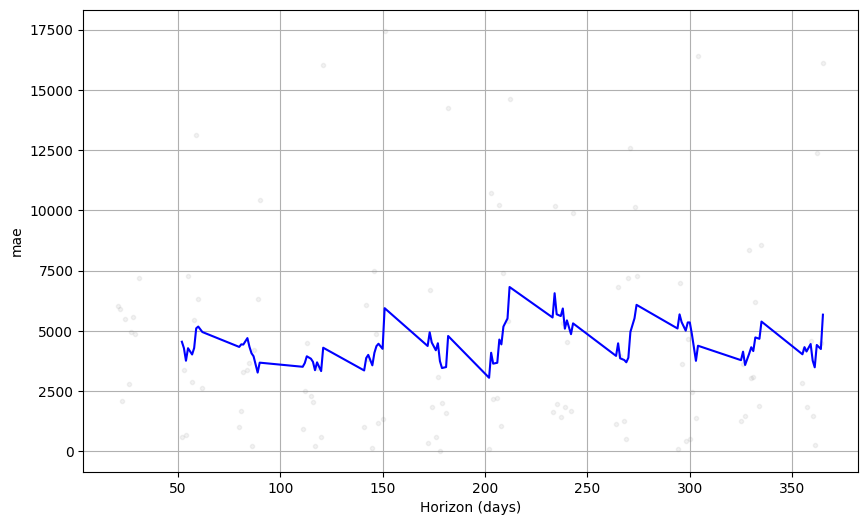

In [75]:
plot_cross_validation_metric(df_cv,metric = 'mae')